# **Decision Tree Implementation for Classification**
Decision Trees are a non-parametric supervised learning method that learn simple if–then–else rules from data features to predict target labels
`scikit-learn.org`
. They are easy to interpret and require little data preparation
`scikit-learn.org`
. In this task, we build and visualize a Decision Tree using scikit-learn on an easy, small dataset (the Iris flower dataset). This choice ensures fast training and no hassles on Google Colab (it has only 150 samples and 4 features)
geeksforgeeks.org
. The steps below outline the full pipeline, with code cells and commentary. All code can be run in Google Colab without extra setup.


**1. Import Required Libraries**

First, we import standard libraries. NumPy handles arrays and scikit-learn provides the Decision Tree implementation and utilities
. Matplotlib is used for plotting the tree. We set a random seed for reproducibility.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# scikit-learn modules for data and model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# (Optional) ignore warnings for clarity
import warnings
warnings.filterwarnings('ignore')

**2. Load the Dataset**

We use scikit-learn’s built-in Iris dataset, a classic small multi-class dataset
. It contains 150 samples of iris flowers with four features (sepal length/width, petal length/width) and 3 classes. This dataset is ideal for demonstration. We load the data into feature matrix `X` and label array `y`.

In [2]:
# Load the Iris dataset
data = load_iris()
X = data.data    # Feature matrix (150 samples, 4 features)
y = data.target  # Target vector (0=setosa,1=versicolor,2=virginica)

# Quick check of data dimensions
print("Features shape:", X.shape)  # Should be (150, 4)
print("Labels shape:", y.shape)    # Should be (150,)

Features shape: (150, 4)
Labels shape: (150,)


**3. Split Data into Training and Test Sets**

We split the data into a training set (70%) and a test set (30%)
. This is done with `train_test_split`, ensuring that the model is evaluated on unseen data. We fix `random_state` for reproducibility.

In [3]:
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Training samples:", X_train.shape[0], "Test samples:", X_test.shape[0])

Training samples: 105 Test samples: 45


**4. Train the Decision Tree Classifier**

We create a `DecisionTreeClassifier` with default parameters (Gini impurity criterion) and fit it on the training data
. Decision trees will repeatedly split the data by features to minimize impurity. For example, by default it uses the “gini” criterion to choose splits


In [4]:
# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)  # default criterion='gini'
clf.fit(X_train, y_train)  # Learn the decision rules from training data

DecisionTreeClassifier(random_state=42)

**5. Evaluate the Model**

After training, we predict on the test set and compute accuracy
. The `accuracy_score` reports the fraction of correct predictions. Since the Iris dataset is small and well-separated, we expect high accuracy.

In [5]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

Test Accuracy: 1.00


**6. Visualize the Decision Tree**

An advantage of decision trees is that they can be visualized as a flowchart of splits
. The `plot_tree` function in scikit-learn draws the tree structure, showing each node’s split rule, Gini impurity, sample counts, and predicted class. We plot the trained tree for the Iris data:

*Figure: A decision tree trained on the Iris dataset (visualized with scikit-learn). Each node shows the splitting rule (e.g. petal width ≤ 0.75), the class distribution, and the predicted class. In this example, the top split uses petal width, separating Setosa on the left and further splitting the right branch.*

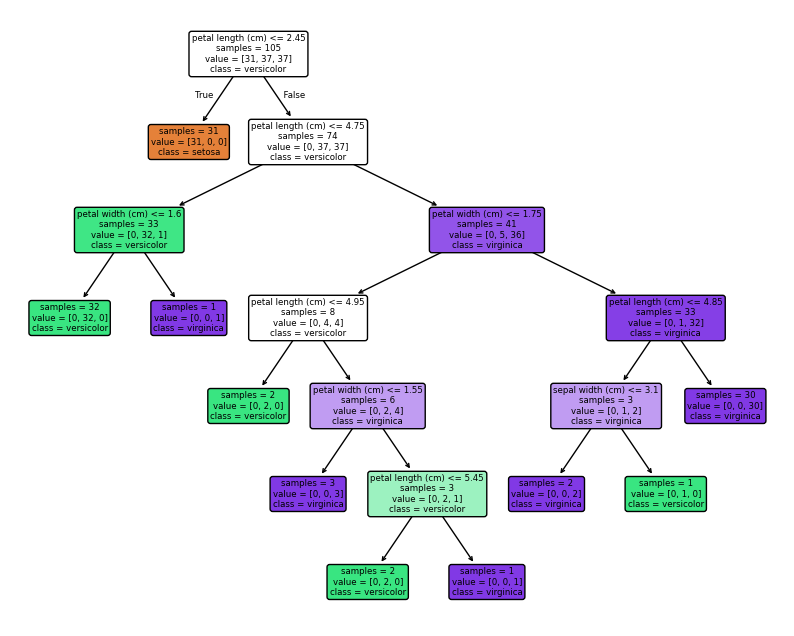

In [6]:
# Plot the decision tree structure
plt.figure(figsize=(10, 8))
plot_tree(
    clf,
    filled=True,
    feature_names=data.feature_names,
    class_names=data.target_names,
    rounded=True,
    impurity=False
)
plt.show()